In [ ]:
from datasets import load_dataset
dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

# Group the DataFrame by job_title_short and calculate the average salary_hour_avg for each job title. Display the result.

salary_1 = df.groupby('job_title_short') [['salary_hour_avg']].mean()
salary_1

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data_jobs.csv:   0%|          | 0.00/231M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

,salary_hour_avg
job_title_short,
Business Analyst,42.723415
Cloud Engineer,45.560715
Data Analyst,38.106918
Data Engineer,57.196998
Data Scientist,49.361403
Machine Learning Engineer,48.477935
Senior Data Analyst,47.661218
Senior Data Engineer,62.848496
Senior Data Scientist,54.105631


In [ ]:
#Calculate the mean of the salary_year_avg column and display the result.
mean_salary = df['salary_year_avg'].mean()
mean_salary

np.float64(123286.27407182401)

In [ ]:
# Calculate the median of the salary_year_avg column and display the result.
median_salary = df['salary_year_avg'].median()
median_salary

115000.0

In [ ]:
# Find the job title with the lowest average hourly salary and display the job title and the salary.
min_salary_index = df['salary_hour_avg'].idxmin()
df.iloc[min_salary_index][['job_title_short', 'salary_hour_avg','job_country']]

,88185
job_title_short,Data Scientist
salary_hour_avg,8.0
job_country,United States


In [ ]:
# Group the DataFrame by job_country and calculate the total number of job postings for each country. Display the result.
#Contar valores para solo una columna --> USAR .value_counts()
df['job_country'].value_counts()

,count
job_country,
United States,206292
India,51088
United Kingdom,40375
France,39922
Germany,27694
...,...
Guinea,4
Lesotho,3
Mauritania,3


In [ ]:
#Contar valores para solo una o mas columnas --> USAR .groupby[ ].size()
df.groupby(['job_title_short', 'job_country']).size()

job_title_short    job_country
Business Analyst   Afghanistan      4
                   Albania         11
                   Algeria         21
                   Angola           1
                   Argentina      453
                                 ... 
Software Engineer  Venezuela        6
                   Vietnam        279
                   Yemen            1
                   Zambia           3
                   Zimbabwe         8
Length: 1387, dtype: int64

**MATPLOT**

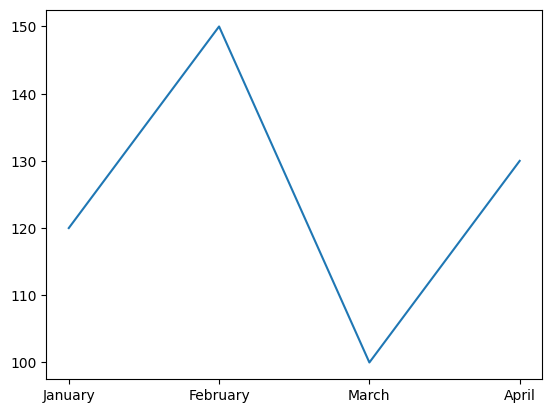

In [ ]:
import matplotlib.pyplot as plt
months888 = ['January', 'February', 'March', 'April']
postings = [120, 150, 100, 130]


plt.plot(months888,postings)

<BarContainer object of 3 artists>

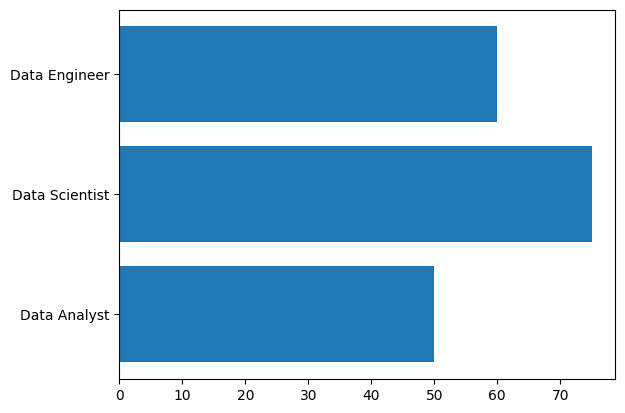

In [ ]:
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']
postings = [50, 75, 60]

plt.barh(job_titles,postings)

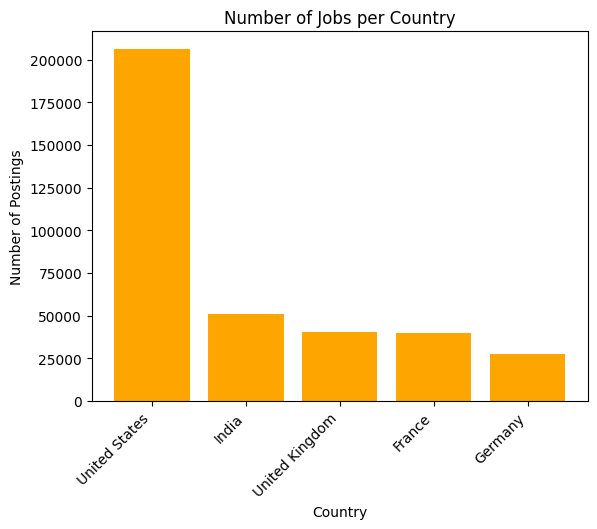

In [ ]:
# Create a bar chart showing the number of job postings for the job_country.
# Use the job_country column and count the number of postings for each location.
# Only get the top 5 job countries. Additionally, change the color of the bars to 'orange'.

job_country_count = df['job_country'].value_counts().head(5)
plt.bar(job_country_count.index,job_country_count,color='orange')

plt.xlabel('Country')
plt.ylabel('Number of Postings')
plt.title('Number of Jobs per Country')
plt.xticks(rotation=45, ha='right')
plt.show()

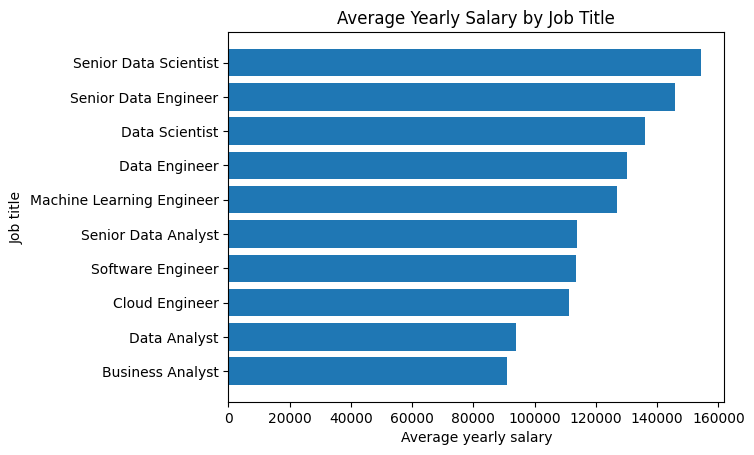

In [ ]:
# Create a horizontal bar chart showing the average yearly salary for different job titles.
# Use the job_title_short and salary_year_avg columns to calculate the average salary for each job title.

#Calculate the mean of the salary_year_avg column and display the result.
mean_salary_job_title = df.groupby('job_title_short')['salary_year_avg'].mean().sort_values(ascending=True)

job_title = df['job_title_short']

plt.figure()
plt.barh(mean_salary_job_title.index, mean_salary_job_title)

plt.xlabel('Average yearly salary')
plt.ylabel('Job title')
plt.title('Average Yearly Salary by Job Title')
plt.show()

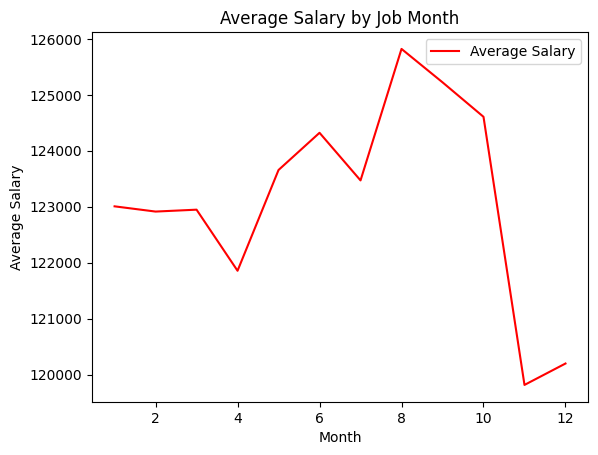

In [ ]:
# Create a line plot showing the trend of average yearly salary over the months of the year.
# Use the job_posted_date column to extract the month and calculate the average salary for each month.

# add month --> job_posted_date
import pandas as pd
import matplotlib.pyplot as plt
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['month_posted'] = df['job_posted_date'].dt.month
count_month = df.month_posted.value_counts()

#Calculate the mean of the salary_year_avg column and display the result.
mean_salary_month = df.groupby('month_posted')['salary_year_avg'].mean().sort_index()
plt.plot(mean_salary_month.index, mean_salary_month.values, color='red',label='Average Salary')

plt.xlabel('Month')
plt.ylabel('Average Salary')
plt.title('Average Salary by Job Month')
plt.legend()


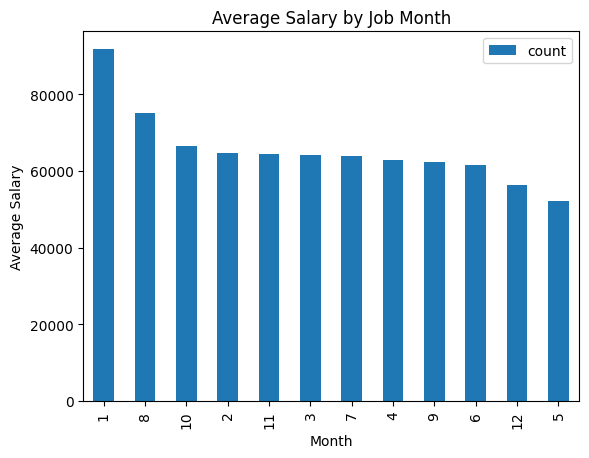

In [ ]:
count_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Salary')
plt.title('Average Salary by Job Month')
plt.legend()

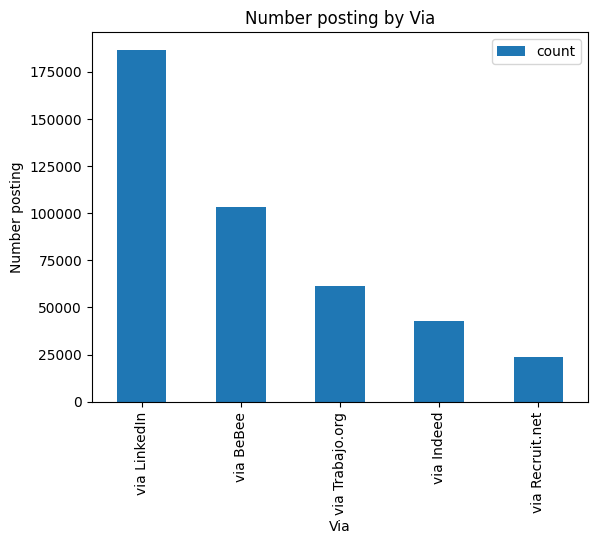

In [ ]:
# Create a bar plot with the Pandas .plot() method showing the top 5 job posting platforms
 # (e.g., LinkedIn, Upwork, etc.) with the highest number of job postings.
 # Use the job_via column to count the number of postings for each platform.
count_via = df['job_via'].value_counts().head(5)
count_via.plot(kind='bar')
plt.xlabel('Via')
plt.ylabel('Number posting')
plt.title('Number posting by Via')
plt.legend()

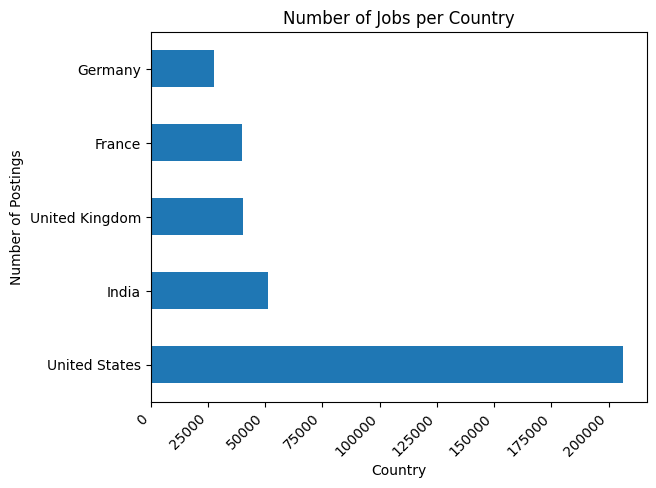

In [ ]:
# Create a bar chart showing the number of job postings for the job_country.
# Use the job_country column and count the number of postings for each location.

job_country_count = df['job_country'].value_counts().head(5)

job_country_count.plot(kind='barh')

plt.xlabel('Country')
plt.ylabel('Number of Postings')
plt.title('Number of Jobs per Country')
plt.xticks(rotation=45, ha='right')
plt.show()

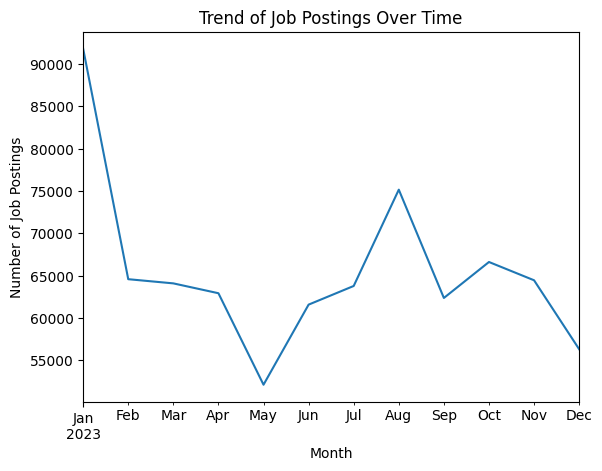

In [ ]:
#Create a DataFrame called monthly_job_counts and use the job_posted_date
# column to count the number of job postings for each month (in the format 'Jan').
#Add labels for the x-axis (label as 'Month'), y-axis (label as 'Number of Job Postings'),
# and a title (set as 'Trend of Job Postings Over Time') for the chart.

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_posted_month'] = df['job_posted_date'].dt.to_period('M')
monthly_job_counts = df['job_posted_month'].value_counts().sort_index()
monthly_job_counts.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')
plt.title('Trend of Job Postings Over Time')
plt.show()
